In [1]:
%matplotlib inline
import os
import glob
import seaborn
import numpy as np
import scipy as sp
import pandas as pd
import scipy.io
import numpy.fft
import scipy.signal
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model, cross_validation
mpl.rcParams['figure.figsize'] = (16, 10)

In [2]:
df = pd.read_csv('../../data/GNG/2016-10-24_10-56-55/ya-oa-gng-ransac-2-24-correct_order.csv')
df = df.dropna()
df = df.drop(df.index[[19]])
df.head()

,SUBJECT,CLASS,SEX,AGE,N_WINDOWS,AVG_PSD,A1,A2,A3,A4,...,B26,B27,B28,B29,B30,FRONTAL,LTEMPORAL,CENTRAL,RTEMPORAL,OCCIPITAL
0,120132101,SA_Control,2.0,80.85,161,-5.741185,-6.346326,-4.572808,-3.995680,-7.593157,...,-6.446069,-7.170717,-8.256764,-6.994475,-4.259656,-7.953588,-8.067912,-8.010609,-6.641327,-6.610278
1,120132104,SA_Control,2.0,83.61,88,-1.833823,-5.376781,-4.488333,-3.429722,-4.965102,...,-6.345626,-5.403405,-4.553709,-5.302604,-2.782416,-4.086620,-4.410285,-4.414241,-3.523224,-5.803661
2,120132107,SA,2.0,91.58,522,-8.045243,-3.676094,-3.878937,0.565285,-3.970267,...,-1.244016,-3.792092,-3.962915,-3.886828,-3.801610,-3.941210,-3.558408,-3.926740,-4.001872,-3.744261
3,120132108,SA_Control,2.0,80.43,57,-7.674207,-6.771235,-6.894668,-5.062593,-6.948668,...,-6.901233,-7.224650,-7.587784,-7.193939,-6.851670,-7.669508,-6.821815,-3.975352,-5.541289,-7.462714
4,120132109,SA_Control,2.0,85.39,220,-3.275914,-1.466296,-0.021467,-3.083844,-2.495630,...,-2.405076,-7.078298,-5.294944,-7.166829,-1.344334,-2.007755,-2.385316,-5.855505,-1.784983,-3.308867


In [3]:
cols = list(df.columns.values)
cols.remove('SUBJECT')
cols.remove('CLASS')
cols.remove('AGE')
cols.remove('N_WINDOWS')
cols.remove('SEX')

X, y = df[cols], df.AGE

In [4]:
pred_train, pred_test, tar_train, tar_test = cross_validation.train_test_split(X, y,
                                                              test_size=.3, random_state=123)

model = linear_model.LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=2.063e-01, previous alpha=1.380e-02, with an active set of 42 regressors.
  ConvergenceWarning)
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=1.505e-01, previous alpha=1.954e-02, with an active set of 41 regressors.
  ConvergenceWarning)
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 78 iterations, alpha=1.501e-01, previous al

In [5]:
# Nicely prints coefficients of linear models [0].
# [0]: http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
def prettyprint(coefs, names=None, sort=False, n_coefs=20):
#     if names == None:
#         names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + \n".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [6]:
print(prettyprint(model.coef_, X.columns, sort=True))

0.0 * AVG_PSD + 
0.0 * A1 + 
0.0 * A2 + 
0.0 * A3 + 
0.0 * A4 + 
0.0 * A5 + 
0.0 * A6 + 
0.0 * A7 + 
0.0 * A8 + 
0.0 * A10 + 
0.0 * A11 + 
0.0 * A12 + 
0.0 * A13 + 
0.0 * A14 + 
0.0 * A15 + 
0.0 * A16 + 
0.0 * A17 + 
0.0 * A18 + 
0.0 * A21 + 
0.0 * A22 + 
0.0 * A23 + 
0.0 * A24 + 
0.0 * A25 + 
0.0 * A26 + 
0.0 * A27 + 
0.0 * A29 + 
0.0 * A30 + 
0.0 * A31 + 
0.0 * B1 + 
0.0 * B2 + 
0.0 * B3 + 
0.0 * B4 + 
0.0 * B5 + 
0.0 * B6 + 
0.0 * B8 + 
0.0 * B9 + 
0.0 * B10 + 
0.0 * B11 + 
0.0 * B12 + 
0.0 * B13 + 
0.0 * B14 + 
0.0 * B17 + 
0.0 * B18 + 
0.0 * B19 + 
0.0 * B20 + 
0.0 * B21 + 
0.0 * B22 + 
0.0 * B23 + 
0.0 * B24 + 
0.0 * B26 + 
0.0 * B27 + 
0.0 * B28 + 
0.0 * B29 + 
0.0 * B30 + 
0.0 * FRONTAL + 
0.0 * LTEMPORAL + 
0.0 * CENTRAL + 
0.0 * RTEMPORAL + 
0.0 * OCCIPITAL


In [7]:
skf = cross_validation.StratifiedKFold(df.AGE)
model = linear_model.LassoLarsCV(cv=skf, precompute=False).fit(X, y)

/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 96 iterations, alpha=2.108e-01, previous alpha=2.034e-03, with an active set of 57 regressors.
  ConvergenceWarning)
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 79 iterations, alpha=1.984e-01, previous alpha=2.028e-03, with an active set of 56 regressors.
  ConvergenceWar

In [8]:
print(prettyprint(model.coef_, X.columns, sort=True))

2.162 * B27 + 
0.119 * B29 + 
-0.067 * A3 + 
0.0 * AVG_PSD + 
0.0 * A1 + 
0.0 * A2 + 
0.0 * A4 + 
0.0 * A5 + 
0.0 * A6 + 
0.0 * A7 + 
0.0 * A8 + 
0.0 * A10 + 
0.0 * A11 + 
0.0 * A12 + 
0.0 * A13 + 
0.0 * A14 + 
0.0 * A15 + 
0.0 * A16 + 
0.0 * A17 + 
0.0 * A18 + 
0.0 * A21 + 
0.0 * A22 + 
0.0 * A23 + 
0.0 * A24 + 
0.0 * A25 + 
0.0 * A26 + 
0.0 * A27 + 
0.0 * A29 + 
0.0 * A30 + 
0.0 * A31 + 
0.0 * B1 + 
0.0 * B2 + 
0.0 * B3 + 
0.0 * B4 + 
0.0 * B5 + 
0.0 * B6 + 
0.0 * B8 + 
0.0 * B9 + 
0.0 * B10 + 
0.0 * B11 + 
0.0 * B12 + 
0.0 * B13 + 
0.0 * B14 + 
0.0 * B17 + 
0.0 * B18 + 
0.0 * B19 + 
0.0 * B20 + 
0.0 * B21 + 
0.0 * B22 + 
0.0 * B23 + 
0.0 * B24 + 
0.0 * B26 + 
0.0 * B28 + 
0.0 * B30 + 
0.0 * FRONTAL + 
0.0 * LTEMPORAL + 
0.0 * CENTRAL + 
0.0 * RTEMPORAL + 
0.0 * OCCIPITAL


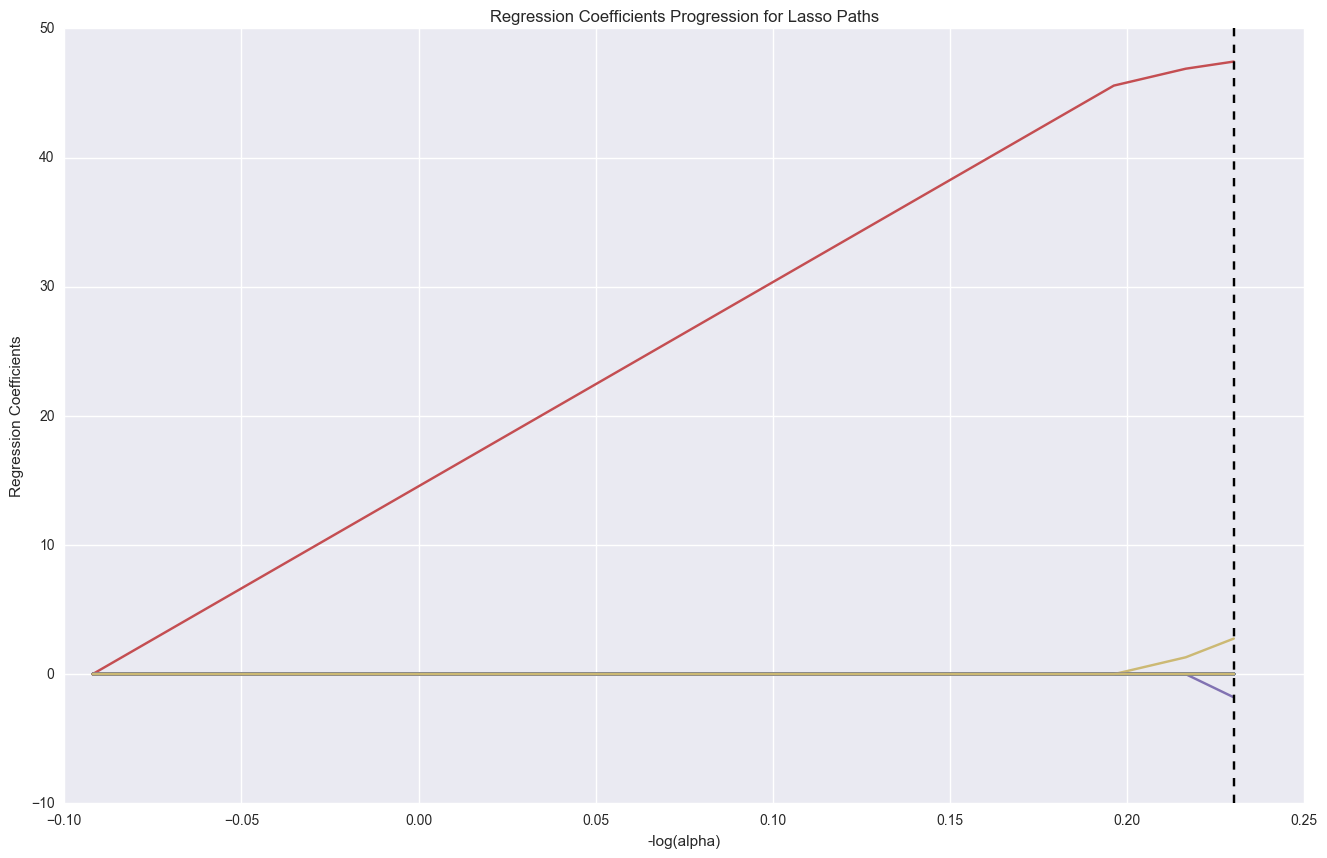

In [9]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
# m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

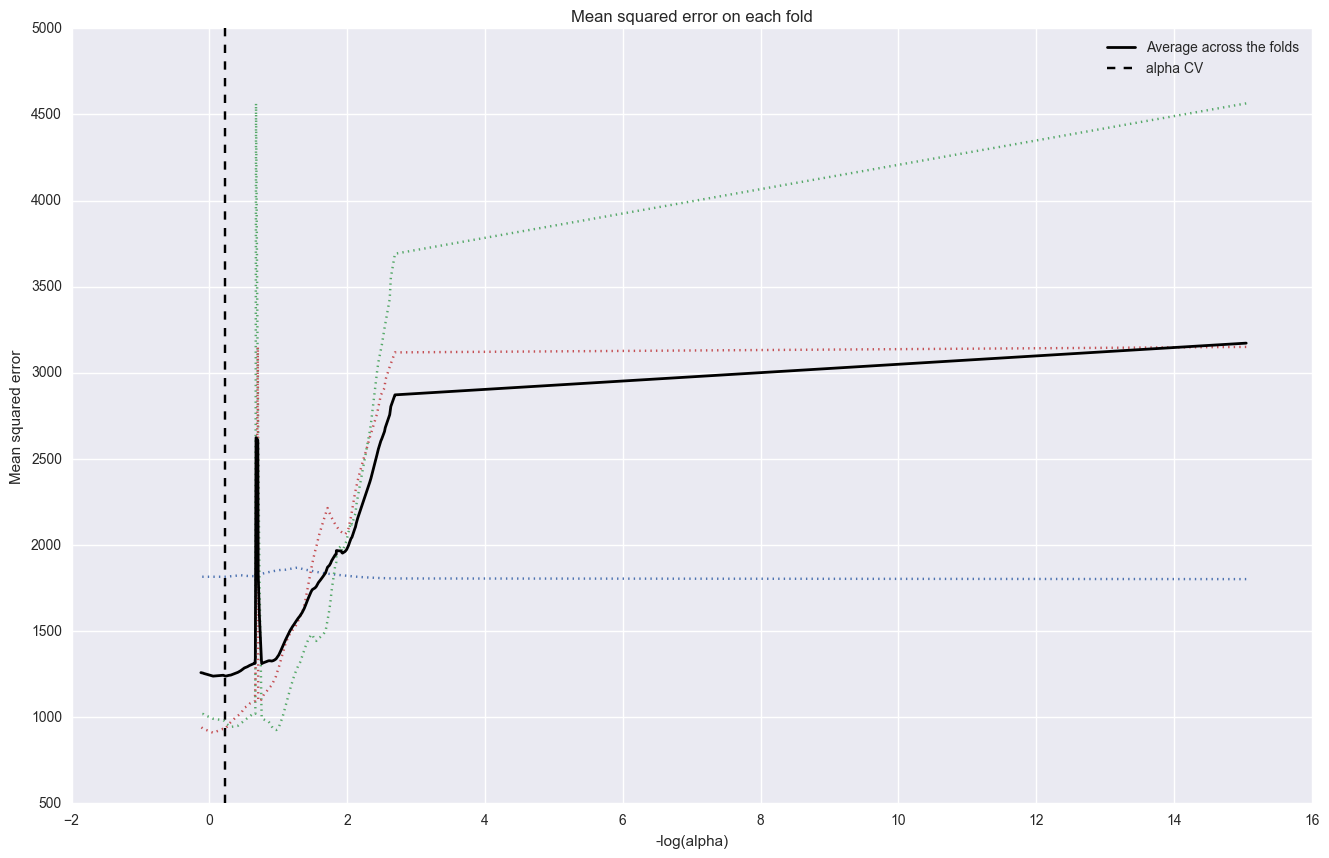

In [10]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [23]:
df = df[df['CLASS'].isin(['DANE', 'MCI_Control', 'SA_Control'])]
X, y = df[cols], df.AGE

pred_train, pred_test, tar_train, tar_test = cross_validation.train_test_split(X, y,
                                                              test_size=.3, random_state=123)

model = linear_model.LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)
print(prettyprint(model.coef_, X.columns, sort=True))

3.004 * B17 + 
-1.468 * A3 + 
-1.22 * B19 + 
1.051 * B30 + 
-0.511 * A2 + 
0.506 * B20 + 
0.336 * B29 + 
0.332 * A11 + 
0.0 * AVG_PSD + 
0.0 * A1 + 
0.0 * A4 + 
0.0 * A5 + 
0.0 * A6 + 
0.0 * A7 + 
0.0 * A8 + 
0.0 * A10 + 
0.0 * A12 + 
0.0 * A13 + 
0.0 * A14 + 
0.0 * A15 + 
0.0 * A16 + 
0.0 * A17 + 
0.0 * A18 + 
0.0 * A21 + 
0.0 * A22 + 
0.0 * A23 + 
0.0 * A24 + 
0.0 * A25 + 
0.0 * A26 + 
0.0 * A27 + 
0.0 * A29 + 
0.0 * A30 + 
0.0 * A31 + 
0.0 * B1 + 
0.0 * B2 + 
0.0 * B3 + 
0.0 * B4 + 
0.0 * B5 + 
0.0 * B6 + 
0.0 * B8 + 
0.0 * B9 + 
0.0 * B10 + 
0.0 * B11 + 
0.0 * B12 + 
0.0 * B13 + 
0.0 * B14 + 
0.0 * B18 + 
0.0 * B21 + 
0.0 * B22 + 
0.0 * B23 + 
0.0 * B24 + 
0.0 * B26 + 
0.0 * B27 + 
0.0 * B28 + 
0.0 * FRONTAL + 
0.0 * LTEMPORAL + 
0.0 * CENTRAL + 
0.0 * RTEMPORAL + 
0.0 * OCCIPITAL


In [24]:
skf = cross_validation.StratifiedKFold(df.AGE)
model = linear_model.LassoLarsCV(cv=skf, precompute=False).fit(X, y)

/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 85 iterations, alpha=2.227e-01, previous alpha=3.800e-03, with an active set of 48 regressors.
  ConvergenceWarning)


In [25]:
print(prettyprint(model.coef_, X.columns, sort=True))

1.395 * B30 + 
0.574 * B17 + 
-0.469 * A3 + 
0.41 * B27 + 
-0.344 * A4 + 
0.0 * AVG_PSD + 
0.0 * A1 + 
0.0 * A2 + 
0.0 * A5 + 
0.0 * A6 + 
0.0 * A7 + 
0.0 * A8 + 
0.0 * A10 + 
0.0 * A11 + 
0.0 * A12 + 
0.0 * A13 + 
0.0 * A14 + 
0.0 * A15 + 
0.0 * A16 + 
0.0 * A17 + 
0.0 * A18 + 
0.0 * A21 + 
0.0 * A22 + 
0.0 * A23 + 
0.0 * A24 + 
0.0 * A25 + 
0.0 * A26 + 
0.0 * A27 + 
0.0 * A29 + 
0.0 * A30 + 
0.0 * A31 + 
0.0 * B1 + 
0.0 * B2 + 
0.0 * B3 + 
0.0 * B4 + 
0.0 * B5 + 
0.0 * B6 + 
0.0 * B8 + 
0.0 * B9 + 
0.0 * B10 + 
0.0 * B11 + 
0.0 * B12 + 
0.0 * B13 + 
0.0 * B14 + 
0.0 * B18 + 
0.0 * B19 + 
0.0 * B20 + 
0.0 * B21 + 
0.0 * B22 + 
0.0 * B23 + 
0.0 * B24 + 
0.0 * B26 + 
0.0 * B28 + 
0.0 * B29 + 
0.0 * FRONTAL + 
0.0 * LTEMPORAL + 
0.0 * CENTRAL + 
0.0 * RTEMPORAL + 
0.0 * OCCIPITAL


In [26]:
resamplings = 200
rlasso = linear_model.RandomizedLasso(alpha=model.alpha_, n_resampling=resamplings)
rlasso.fit(X, y)
print("Features sorted by score, using {} resamplings: ".format(resamplings))
feature_list = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), cols), reverse=True)
for f in feature_list: 
    print(f)

/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py

Features sorted by score, using 200 resamplings: 
(0.48499999999999999, 'B30')
(0.36499999999999999, 'B17')
(0.36499999999999999, 'A3')
(0.34999999999999998, 'A4')
(0.33000000000000002, 'B27')
(0.255, 'A31')
(0.16500000000000001, 'B24')
(0.16, 'B29')
(0.13500000000000001, 'AVG_PSD')
(0.11, 'B14')
(0.089999999999999997, 'OCCIPITAL')
(0.080000000000000002, 'A29')
(0.074999999999999997, 'B4')
(0.070000000000000007, 'B2')
(0.055, 'A27')
(0.055, 'A2')
(0.050000000000000003, 'A10')
(0.044999999999999998, 'A8')
(0.044999999999999998, 'A30')
(0.035000000000000003, 'B8')
(0.029999999999999999, 'B20')
(0.029999999999999999, 'A6')
(0.029999999999999999, 'A25')
(0.025000000000000001, 'A5')
(0.02, 'B3')
(0.02, 'A1')
(0.014999999999999999, 'RTEMPORAL')
(0.014999999999999999, 'LTEMPORAL')
(0.014999999999999999, 'B21')
(0.014999999999999999, 'A15')
(0.014999999999999999, 'A13')
(0.014999999999999999, 'A11')
(0.01, 'B6')
(0.01, 'B23')
(0.01, 'B1')
(0.01, 'A26')
(0.01, 'A21')
(0.0050000000000000001, 'B1

/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/randomized_l1.py

# ----------------------------------

In [11]:
data = df[df['CLASS'].isin(['DANE', 'MCI_Control'])]
dane = df[df['CLASS'].isin(['DANE'])]
mci_control = df[df['CLASS'].isin(['MCI_Control'])]
####
mci_cohort   = df[df['CLASS'].isin(['MCI', 'MCI_Control'])]                
sa_cohort    = df[df['CLASS'].isin(['SA', 'SA_Control'])]
sa_control   = df[df['CLASS'].isin(['SA_Control'])]
older_adults = df[df['CLASS'].isin(['MCI', 'MCI_Control', 'SA_Control'])]  
controls     = df[df['CLASS'].isin(['DANE', 'SA_Control', 'MCI_Control'])] 
sa           = df[df['CLASS'].isin(['SA'])]                                
mci          = df[df['CLASS'].isin(['MCI'])]   

X = data[cols]
y = data.AGE

In [12]:
pred_train, pred_test, tar_train, tar_test = cross_validation.train_test_split(X, y,
                                                              test_size=.3, random_state=123)

model = linear_model.LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [13]:
print(prettyprint(model.coef_, X.columns, sort=True))

1.32 * B27 + 
0.326 * B30 + 
0.0 * AVG_PSD + 
0.0 * A1 + 
0.0 * A2 + 
0.0 * A3 + 
0.0 * A4 + 
0.0 * A5 + 
0.0 * A6 + 
0.0 * A7 + 
0.0 * A8 + 
0.0 * A10 + 
0.0 * A11 + 
0.0 * A12 + 
0.0 * A13 + 
0.0 * A14 + 
0.0 * A15 + 
0.0 * A16 + 
0.0 * A17 + 
0.0 * A18 + 
0.0 * A21 + 
0.0 * A22 + 
0.0 * A23 + 
0.0 * A24 + 
0.0 * A25 + 
0.0 * A26 + 
0.0 * A27 + 
0.0 * A29 + 
0.0 * A30 + 
0.0 * A31 + 
0.0 * B1 + 
0.0 * B2 + 
0.0 * B3 + 
0.0 * B4 + 
0.0 * B5 + 
0.0 * B6 + 
0.0 * B8 + 
0.0 * B9 + 
0.0 * B10 + 
0.0 * B11 + 
0.0 * B12 + 
0.0 * B13 + 
0.0 * B14 + 
0.0 * B17 + 
0.0 * B18 + 
0.0 * B19 + 
0.0 * B20 + 
0.0 * B21 + 
0.0 * B22 + 
0.0 * B23 + 
0.0 * B24 + 
0.0 * B26 + 
0.0 * B28 + 
0.0 * B29 + 
0.0 * FRONTAL + 
0.0 * LTEMPORAL + 
0.0 * CENTRAL + 
0.0 * RTEMPORAL + 
0.0 * OCCIPITAL


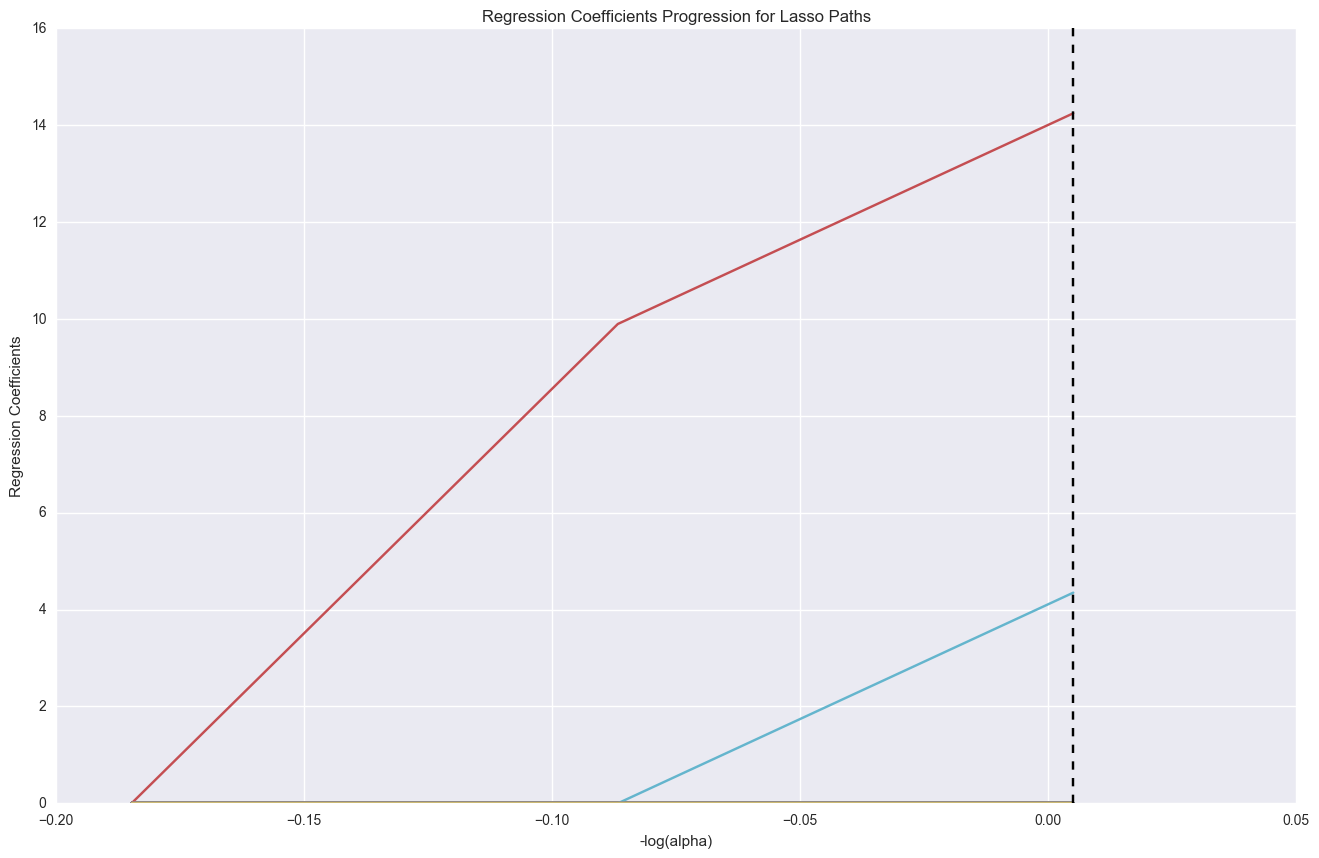

In [14]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

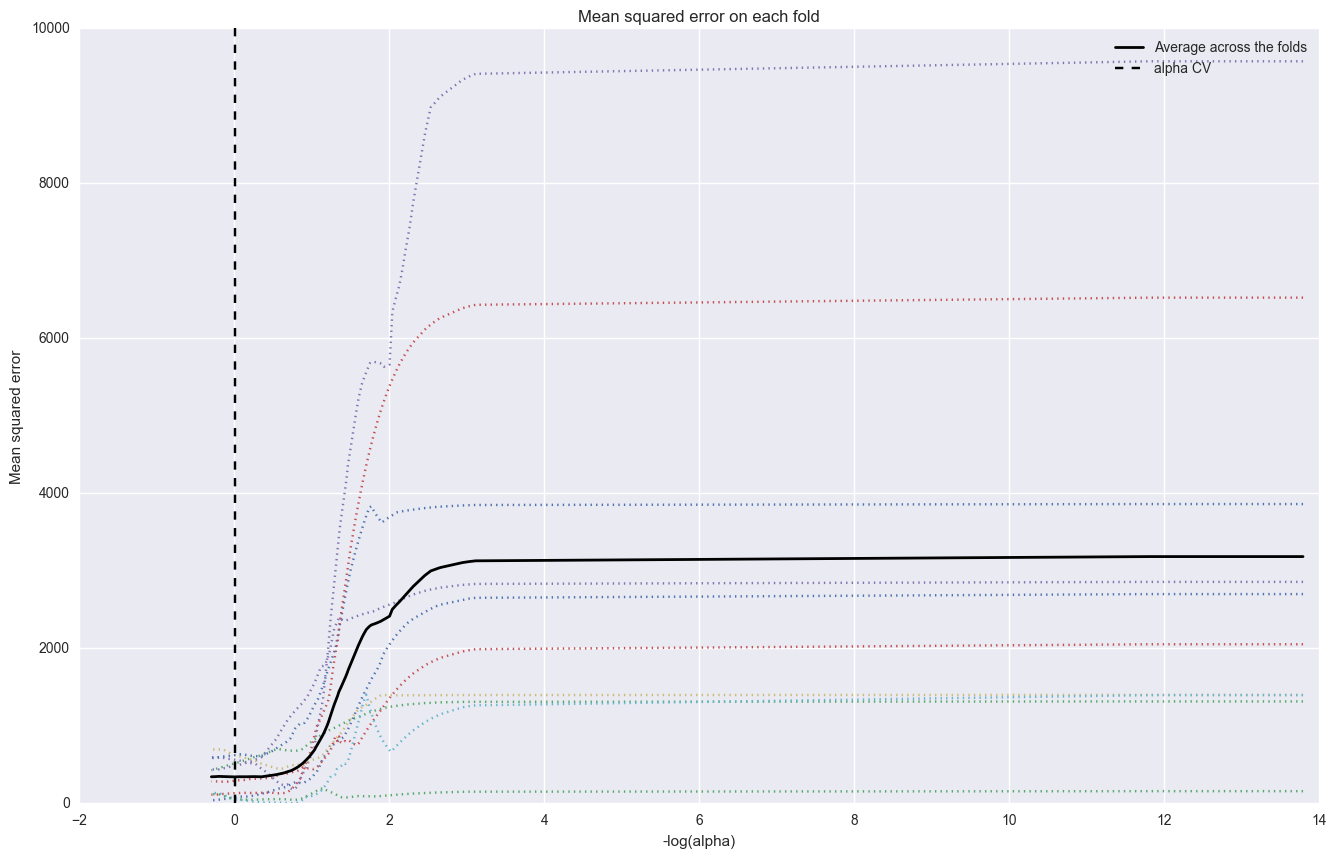

In [15]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [16]:
skf = cross_validation.StratifiedKFold(data.AGE)
model = linear_model.LassoLarsCV(cv=skf, precompute=False).fit(X, y)

/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
/Users/jorge/Development/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 80 iterations, alpha=1.469e-01, previous alpha=7.175e-03, with an active set of 39 regressors.
  ConvergenceWarning)


In [17]:
print(prettyprint(model.coef_, X.columns, sort=True))

0.0 * AVG_PSD + 
0.0 * A1 + 
0.0 * A2 + 
0.0 * A3 + 
0.0 * A4 + 
0.0 * A5 + 
0.0 * A6 + 
0.0 * A7 + 
0.0 * A8 + 
0.0 * A10 + 
0.0 * A11 + 
0.0 * A12 + 
0.0 * A13 + 
0.0 * A14 + 
0.0 * A15 + 
0.0 * A16 + 
0.0 * A17 + 
0.0 * A18 + 
0.0 * A21 + 
0.0 * A22 + 
0.0 * A23 + 
0.0 * A24 + 
0.0 * A25 + 
0.0 * A26 + 
0.0 * A27 + 
0.0 * A29 + 
0.0 * A30 + 
0.0 * A31 + 
0.0 * B1 + 
0.0 * B2 + 
0.0 * B3 + 
0.0 * B4 + 
0.0 * B5 + 
0.0 * B6 + 
0.0 * B8 + 
0.0 * B9 + 
0.0 * B10 + 
0.0 * B11 + 
0.0 * B12 + 
0.0 * B13 + 
0.0 * B14 + 
0.0 * B17 + 
0.0 * B18 + 
0.0 * B19 + 
0.0 * B20 + 
0.0 * B21 + 
0.0 * B22 + 
0.0 * B23 + 
0.0 * B24 + 
0.0 * B26 + 
0.0 * B27 + 
0.0 * B28 + 
0.0 * B29 + 
0.0 * B30 + 
0.0 * FRONTAL + 
0.0 * LTEMPORAL + 
0.0 * CENTRAL + 
0.0 * RTEMPORAL + 
0.0 * OCCIPITAL


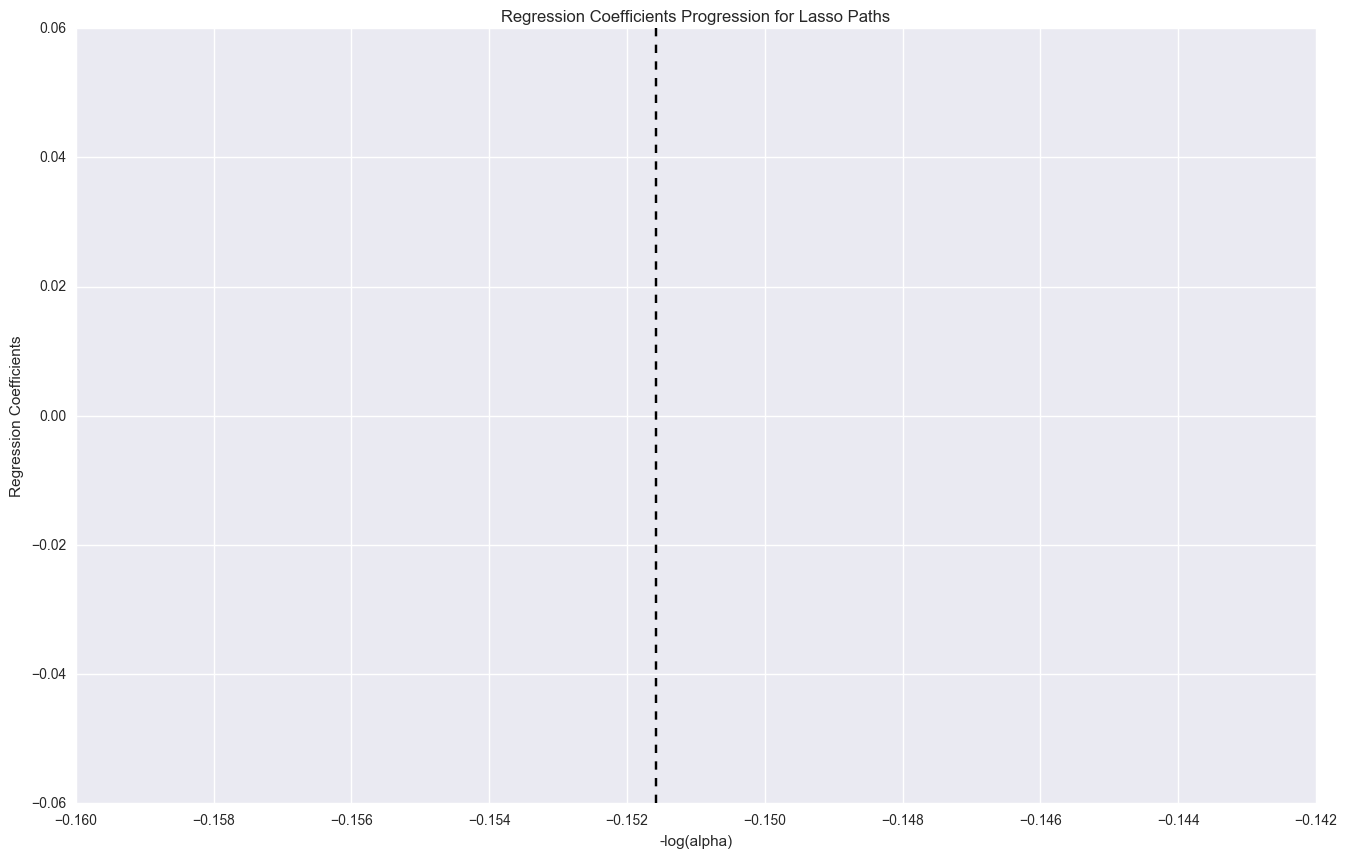

In [18]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
# m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

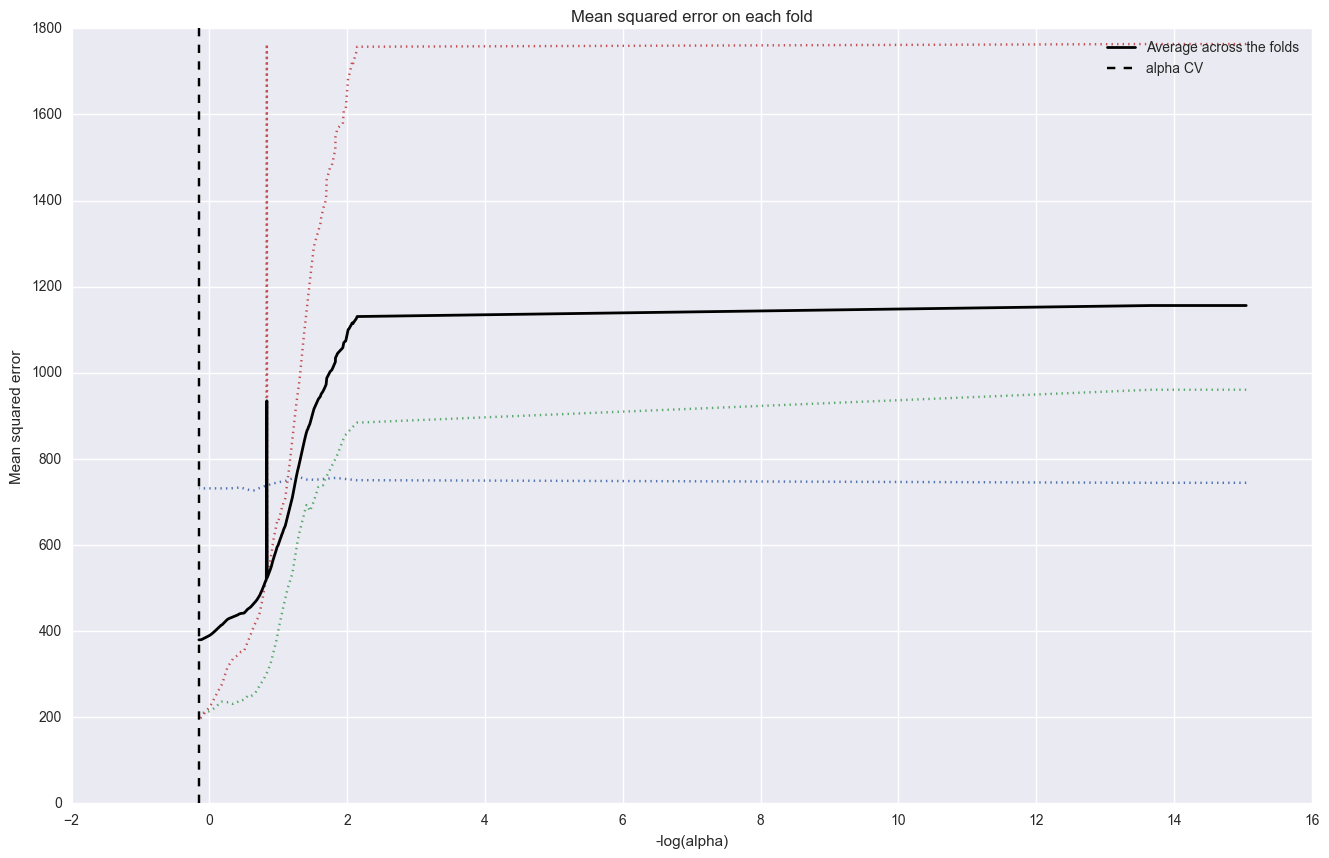

In [19]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')